## MAF Analysis of PTF's pointing history

The PTF + iPTF pointing history in OpSIM format may be obtained [here](https://drive.google.com/open?id=0B1JdxriG9g8hUk1aRUtqME93Y28).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import lsst.sims.maf.plots as plots
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db

In [2]:
# hack to get the path right
import sys
sys.path.append('..')

from ztf_maf.slicers import HealpixZTFSlicer
from ztf_maf.plots import ZTFBaseSkyMap

In [8]:
#slicer = HealpixZTFSlicer(nside=64, lonCol='fieldRA', latCol='fieldDec')

# if we have no field overlaps (single pointing grid), a FieldSlicer will be faster
slicer = slicers.OpsimFieldSlicer()
# modify to use ZTF field shapes
slicer.plotFuncs = [ZTFBaseSkyMap, plots.OpsimHistogram]

metricList = []

m1 = metrics.IntraNightGapsMetric()
metricList.append(m1)
m2 = metrics.InterNightGapsMetric()
metricList.append(m2)
m3 = metrics.CountMetric(col='fieldRA')
metricList.append(m3)

filters = ['r']

summaryMetrics = [metrics.MinMetric(), metrics.MeanMetric(), metrics.MaxMetric(), 
                  metrics.MedianMetric(), metrics.RmsMetric(), 
                 metrics.PercentileMetric(percentile=25), metrics.PercentileMetric(percentile=75)]

   
bDict={}
for i,metric in enumerate(metricList):

    for j, filt in enumerate(filters):
        sqlconstraint = "filter = '%s'"%(filt)

    
        bDict[sqlconstraint+metric.name] = metricBundles.MetricBundle(metric, slicer, sqlconstraint, 
                                          summaryMetrics=summaryMetrics,
                                          plotDict={'radius': np.radians(np.sqrt((3.5/2.)**2. + (2.31/2.)**2.)), 'fov_hwidth':3.5/2., 'fov_hlength':2.31/2.})

Querying database with constraint filter = 'r'
Found 348123 visits
Running:  ["filter = 'r'Median Intra-Night Gap", "filter = 'r'Count fieldRA", "filter = 'r'Median Inter-Night Gap"]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter = 'r' constraint now.


/Users/ebellm/anaconda/envs/maf/opt/lsst/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 241 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/ebellm/anaconda/envs/maf/opt/lsst/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 840 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))
/Users/ebellm/anaconda/envs/maf/opt/lsst/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:60: UserWarning: Optimal bin calculation tried to make 4618 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Plotting complete.


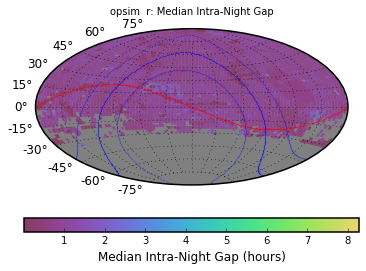

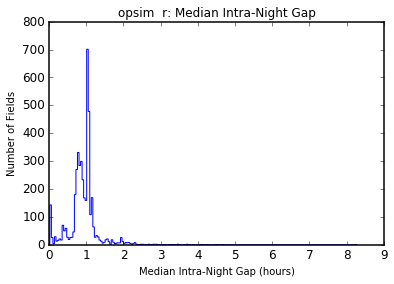

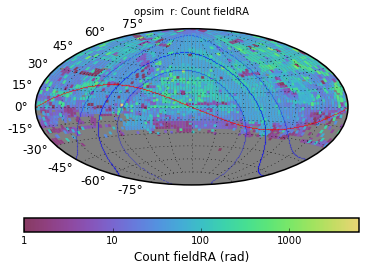

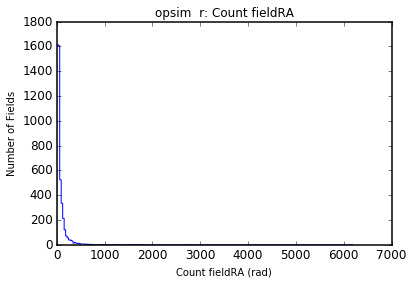

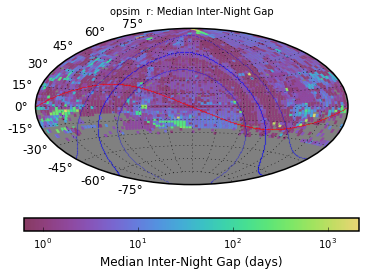

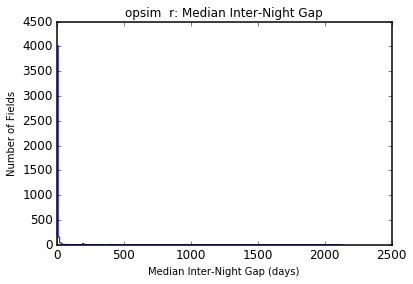

In [9]:
outDir = 'PTF_test'
ztfDB = db.OpsimDatabase('../data/ptf.db',
                        defaultdbTables={'Summary':['Summary','obsHistID']})
ztfDB.raColName = 'fieldRA'
ztfDB.decColName = 'fieldDec'

resultsDb = db.ResultsDb(outDir=outDir)

bgroup = metricBundles.MetricBundleGroup(bDict, ztfDB, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()
bgroup.plotAll(closefigs=False)

In [10]:
for key in sorted(bDict):
    bDict[key].computeSummaryStats(resultsDb=resultsDb)
    print key, bDict[key].summaryValues

filter = 'r'Count fieldRA {'25th%ile': 19.0, 'Rms': 141.97146163099256, '75th%ile': 81.0, 'Min': 1.0, 'Max': 6193.0, 'Median': 44.0, 'Mean': 73.08901952550913}
filter = 'r'Median Inter-Night Gap {'25th%ile': 1.0010849999962375, 'Rms': 85.769417339759059, '75th%ile': 4.7794799999974202, 'Min': 0.63412000000244007, 'Max': 2135.9366000000009, 'Median': 1.9904000000024098, 'Mean': 13.016231495175795}
filter = 'r'Median Intra-Night Gap {'25th%ile': 0.77447999994910788, 'Rms': 0.42057922917747342, '75th%ile': 1.054769999886048, 'Min': 0.020759999955771491, 'Max': 8.274749995325692, 'Median': 0.93155999999726191, 'Mean': 0.92973581823886209}
